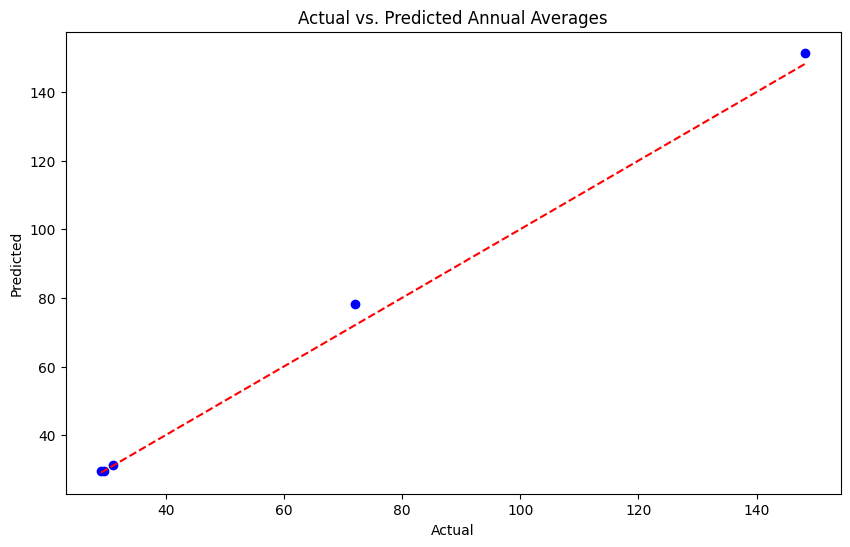

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv('Elområde 3 Stockholm.csv')  # Replace with the actual file path

# Check for missing values in the target variable (Annual Average) and handle them
if data['Annual Average'].isnull().any():
    # If there are missing values in the target variable, you can drop those rows
    data = data.dropna(subset=['Annual Average'])

# Extract the features (months) and the target variable (Annual Average)
X = data.iloc[:, 1:-1]  # Features (Jan to Dec)
y = data['Annual Average']  # Target variable

# Handle missing values (NaN) using imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the annual averages on the test data
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Annual Averages')
plt.show()


C:\Users\ch_ra\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ch_ra\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ch_ra\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\ch_ra\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to 

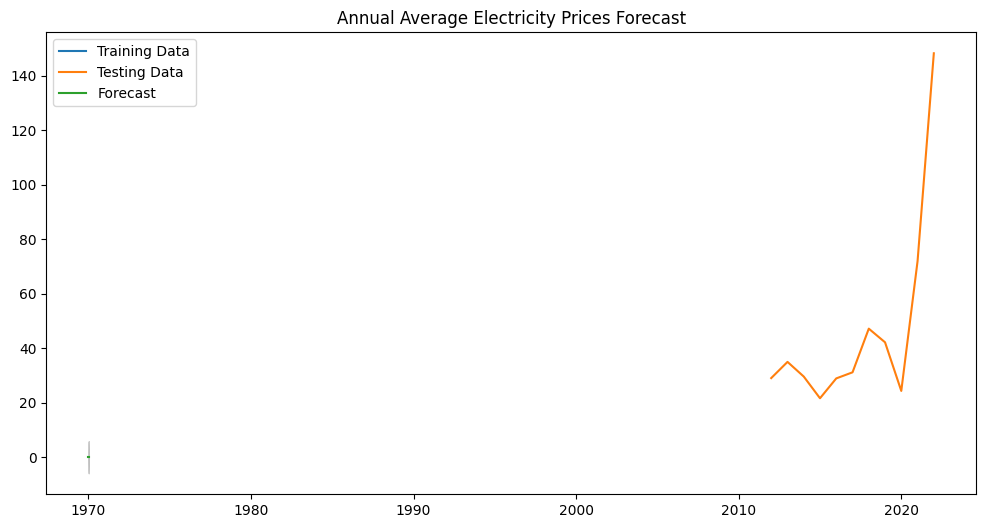

Forecasted Prices for the Next 10 Years:
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: predicted_mean, dtype: float64


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your historical data
data = pd.read_csv('Elområde 3 Stockholm.csv')
data['Year/Month'] = data['Year/Month'].apply(lambda x: pd.to_datetime(str(x), format='%Y'))
data.set_index('Year/Month', inplace=True)

# Train-test split
train = data['Annual Average'][:-12]  # Data up to the last year
test = data['Annual Average'][-12:]   # The last year for testing

# Define and fit the SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), initialization='approximate_diffuse')
results = model.fit()
# Predict future values
forecast = results.get_forecast(steps=10)

# Confidence intervals for the forecast
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.2)
plt.title('Annual Average Electricity Prices Forecast')
plt.legend()
plt.show()

# Display the forecasted values
print("Forecasted Prices for the Next 10 Years:")
print(forecast.predicted_mean)


Predicted Annual Averages for 2024 to 2033:
[46.31190909 46.31190909 46.31190909 46.31190909 46.31190909 46.31190909
 46.31190909 46.31190909 46.31190909 46.31190909]


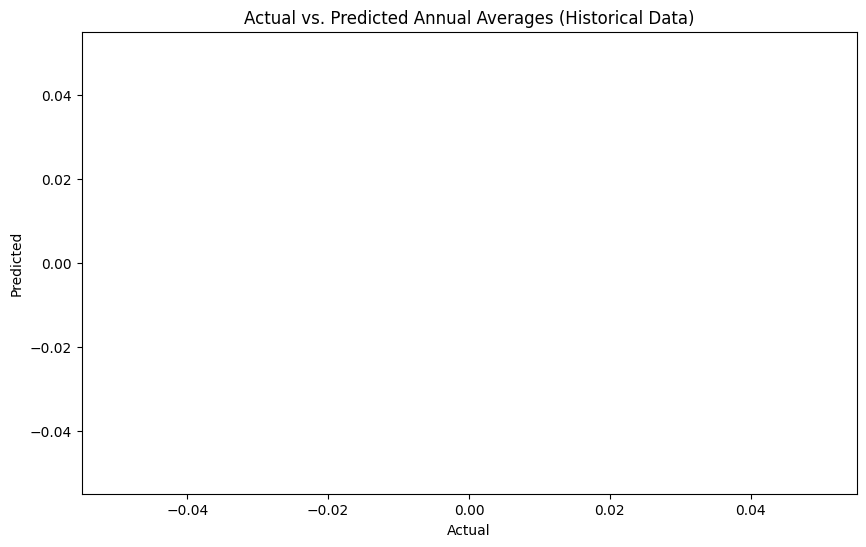

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv('Elområde 3 Stockholm.csv')  # Replace with the actual file path
if data['Annual Average'].isnull().any():
    # If there are missing values in the target variable, you can drop those rows
    data = data.dropna(subset=['Annual Average'])

# Extend the dataset to include future years (up to 2033)
future_years = list(range(2024, 2034))
future_data = pd.DataFrame({'Year': future_years})
data = pd.concat([data, future_data], ignore_index=True)

# Features and target variable
X = data.iloc[:, 1:-1]
y = data['Annual Average']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:len(data)-10], X[len(data)-10:], y[:len(data)-10], y[len(data)-10:]

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the annual averages for the next 10 years
y_pred = model.predict(X_test)

# Print the predictions
print("Predicted Annual Averages for 2024 to 2033:")
print(y_pred)

# Plot the actual vs. predicted values for the historical data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Annual Averages (Historical Data)')
plt.show()


In [19]:
import requests
from datetime import datetime, timedelta

# Define the API endpoint URL
api_url = "https://api.scb.se/OV0104/v1/doris/en/ssd/START/EN/EN0301/SSDManadElAvtalstyp"

# Define the start and end dates for the range you want to retrieve
start_date = datetime(2013, 4, 1)  # April 2013
end_date = datetime(2023, 9, 1)    # September 2023

# Create an empty list to store the formatted month values
months = []

# Generate a list of months between start_date and end_date
current_date = start_date
while current_date <= end_date:
    formatted_month = current_date.strftime("%YM%m")
    months.append(formatted_month)
    current_date += timedelta(days=30)  # Increment by approximately one month

# Define your JSON query with the generated list of months
query_data = {
    "query": [
        {
            "code": "Elomrade",
            "selection": {
                "filter": "item",
                "values": ["00"]
            }
        },
        {
            "code": "Avtalstyp",
            "selection": {
                "filter": "item",
                "values": ["anvisat"]
            }
        },
        {
            "code": "Tid",
            "selection": {
                "filter": "item",
                "values": months
            }
        }
    ],
    "response": {
        "format": "px"
    }
}

# Send the GET request to the API
response = requests.post(api_url, json=query_data)

# Check if the request was successful
if response.status_code == 200:
    # Parse and process the response data here
    response_data = response.json()
    print(response_data)
else:
    print(f"Request failed with status code {response.status_code}")

# You can now process the response_data as needed for your specific use case.


Request failed with status code 400


In [21]:
import requests
from datetime import datetime, timedelta

# Define the API endpoint URL
api_url = "https://api.scb.se/OV0104/v1/doris/en/ssd/START/EN/EN0301/SSDManadElhandelpris"

# Define your JSON query
query_data = {
    "query": [
        {
            "code": "Avtalstyp",
            "selection": {
                "filter": "item",
                "values": ["anvisat"]
            }
        },
        {
            "code": "Kundkategori",
            "selection": {
                "filter": "item",
                "values": ["3"]
            }
        },
        {
            "code": "Tid",
            "selection": {
                "filter": "time",
                "values": []
            }
        }
    ],
    "response": {
        "format": "json"
    }
}

# Define the start and end dates for the range you want to retrieve
start_date = datetime(2013, 4, 1)  # April 2013
end_date = datetime(2023, 9, 1)    # September 2023

# Create a list of months between start_date and end_date
current_date = start_date
while current_date <= end_date:
    formatted_month = current_date.strftime("%YM%m")
    query_data["query"][2]["selection"]["values"].append(formatted_month)
    current_date += timedelta(days=30)  # Increment by approximately one month

# Send the GET request to the API
response = requests.post(api_url, json=query_data)

# Check if the request was successful
if response.status_code == 200:
    # Parse and process the response data here
    response_data = response.json()
    print(response_data)
else:
    print(f"Request failed with status code {response.status_code}")

# You can now process the response_data as needed for your specific use case.
print(response.content)



Request failed with status code 400
b'Bad Request'


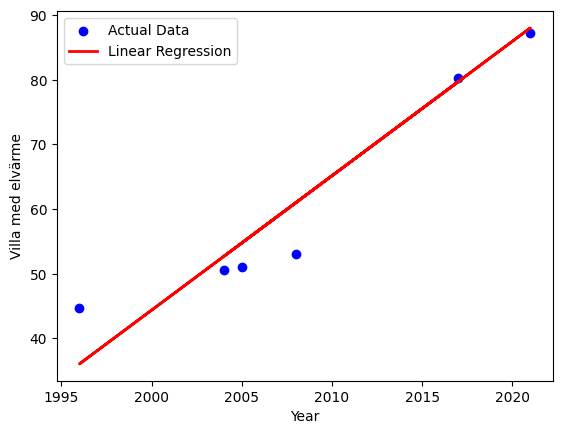

Predicted kWh price 2024: 94.26055007943978
    Year  Predicted kWh price
0   2025            96.339167
1   2026            98.417784
2   2027           100.496401
3   2028           102.575018
4   2029           104.653635
5   2030           106.732252
6   2031           108.810869
7   2032           110.889486
8   2033           112.968103
9   2034           115.046719
10  2035           117.125336
11  2036           119.203953
12  2037           121.282570
13  2038           123.361187
14  2039           125.439804
15  2040           127.518421
16  2041           129.597038
17  2042           131.675655
18  2043           133.754272
19  2044           135.832889
Mean Squared Error (MSE): 26.484817369512502
R-squared (R²): 0.9003831166416238


C:\Users\ch_ra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ch_ra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Load the data
data = pd.read_csv("elpriser_sverige96-23.csv")  
# List of columns to increase by 25% (skatt)
columns_to_increase = ['Lägenhet', 'Villa utan elvärme', 'Villa med elvärme', 'Större hushåll', 'Näringsverksamhet', 'Småindustri']

# Add 25% to the specified columns
data[columns_to_increase] = data[columns_to_increase] * 1.25

#columns of interest
data = data[["Year", "Villa utan elvärme"]]

# Split the data into features (X) and the target (y)
X = data[["Year"]]
y = data["Villa utan elvärme"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Visualize the results (optional)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel("Year")
plt.ylabel("Villa med elvärme")
plt.legend()
plt.show()

# Now, you can use the model to make predictions for any given year
year_to_predict = 2024
predicted_value = model.predict([[year_to_predict]])
print(f"Predicted kWh price {year_to_predict}: {predicted_value[0]}")

# Create a list of future years for prediction
future_years = [2024 + i for i in range(1, 21)]  # Predict for the next 20 years

# Predict 'Villa med elvärme' values for each future year
future_predictions = model.predict([[year] for year in future_years])

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'Year': future_years, 'Predicted kWh price': future_predictions})

# Display the predictions
print(predictions_df)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")



C:\Users\ch_ra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


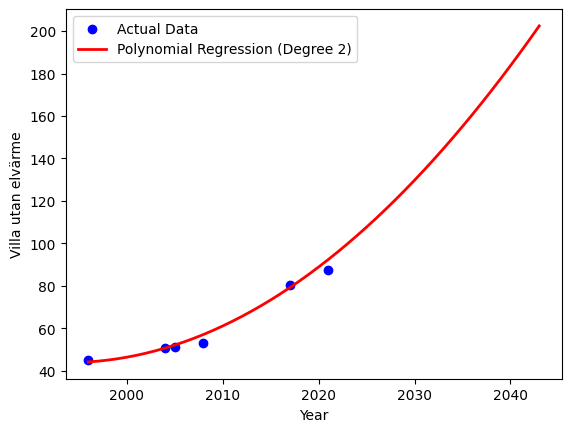

Predicted kWh price 2024: 103.58661335115903
    Year  Predicted kWh price
0   2025           107.610979
1   2026           111.766293
2   2027           116.052556
3   2028           120.469768
4   2029           125.017929
5   2030           129.697038
6   2031           134.507096
7   2032           139.448103
8   2033           144.520058
9   2034           149.722962
10  2035           155.056815
11  2036           160.521617
12  2037           166.117368
13  2038           171.844067
14  2039           177.701715
15  2040           183.690311
16  2041           189.809857
17  2042           196.060351
18  2043           202.441794
19  2044           208.954186
Mean Squared Error (MSE): 7.395872506428297
R-squared (R²): 0.9721820332559896


C:\Users\ch_ra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\ch_ra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [38]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv("elpriser_sverige96-23.csv")  

# List of columns to increase by 25% (skatt)
columns_to_increase = ['Lägenhet', 'Villa utan elvärme', 'Villa med elvärme', 'Större hushåll', 'Näringsverksamhet', 'Småindustri']

# Add 25% to the specified columns
data[columns_to_increase] = data[columns_to_increase] * 1.25

# Select the columns of interest
data = data[["Year", "Villa utan elvärme"]]

# Split the data into features (X) and the target (y)
X = data[["Year"]]
y = data["Villa utan elvärme"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 2  # You can change the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Visualize the results (optional)
x_values = np.arange(1996, 2044, 1)
x_values_poly = poly.transform(x_values.reshape(-1, 1))
y_values_poly = model.predict(x_values_poly)

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(x_values, y_values_poly, color='red', linewidth=2, label=f'Polynomial Regression (Degree {degree})')
plt.xlabel("Year")
plt.ylabel("Villa utan elvärme")
plt.legend()
plt.show()

# Now, you can use the model to make predictions for any given year
year_to_predict = 2024
year_to_predict_poly = poly.transform([[year_to_predict]])
predicted_value = model.predict(year_to_predict_poly)
print(f"Predicted kWh price {year_to_predict}: {predicted_value[0]}")

# Create a list of future years for prediction
future_years = [2024 + i for i in range(1, 21)]  # Predict for the next 20 years
future_years_poly = poly.transform(np.array(future_years).reshape(-1, 1))

# Predict 'Villa utan elvärme' values for each future year
future_predictions = model.predict(future_years_poly)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'Year': future_years, 'Predicted kWh price': future_predictions})

# Display the predictions
print(predictions_df)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Metrics for Linear Regression:
Mean Squared Error (MSE): 26.484817369512502
R-squared (R²): 0.9003831166416238
Metrics for Decision Tree:
Mean Squared Error (MSE): 3.6744791666666665
R-squared (R²): 0.9861792453600237
Metrics for Random Forest:
Mean Squared Error (MSE): 2.0483263020833316
R-squared (R²): 0.992295665872727
Metrics for SVR:
Mean Squared Error (MSE): 113.57861726401826
R-squared (R²): 0.572798720484301
Metrics for KNN:
Mean Squared Error (MSE): 5.008020833333334
R-squared (R²): 0.9811634182614842


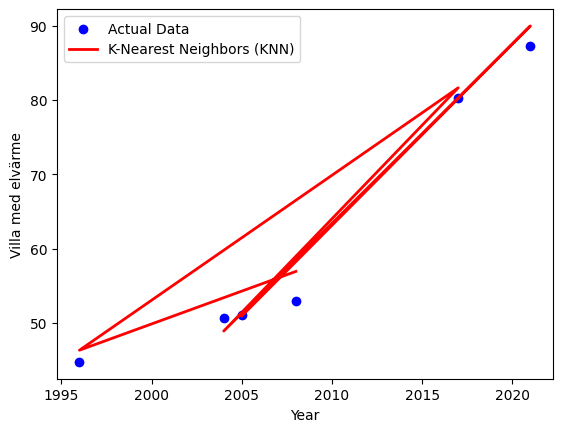

Predicted kWh price 2024 using KNN: 89.95


C:\Users\ch_ra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [39]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("elpriser_sverige96-23.csv")
# List of columns to increase by 25% (skatt)
columns_to_increase = ['Lägenhet', 'Villa utan elvärme', 'Villa med elvärme', 'Större hushåll', 'Näringsverksamhet', 'Småindustri']

# Add 25% to the specified columns
data[columns_to_increase] = data[columns_to_increase] * 1.25

# Columns of interest
data = data[["Year", "Villa utan elvärme"]]

# Split the data into features (X) and the target (y)
X = data[["Year"]]
y = data["Villa utan elvärme"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to store model names and their corresponding model instances
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(n_neighbors=5)  # You can change k (n_neighbors) as needed.
}

# Iterate through models and evaluate each one
for model_name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (R²)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")

# Visualize the results of the last model (KNN)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='K-Nearest Neighbors (KNN)')
plt.xlabel("Year")
plt.ylabel("Villa med elvärme")
plt.legend()
plt.show()

# Now, you can use the model to make predictions for any given year
year_to_predict = 2024
predicted_value = models["KNN"].predict([[year_to_predict]])
print(f"Predicted kWh price {year_to_predict} using KNN: {predicted_value[0]}")


Metrics for Decision Tree:
Mean Squared Error (MSE): 3.6744791666666665
R-squared (R²): 0.9861792453600237


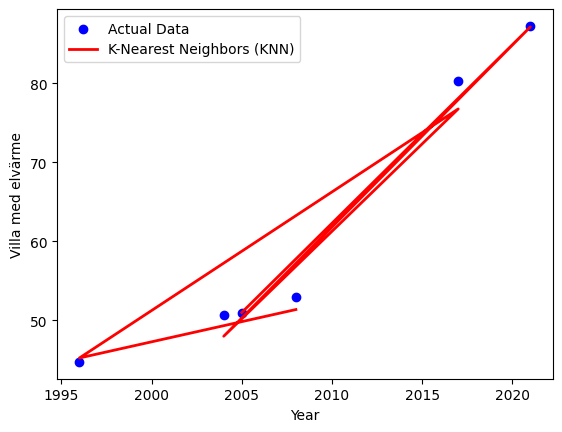

C:\Users\ch_ra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\ch_ra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but DecisionTreeRegressor is expecting 1 features as input.

In [40]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("elpriser_sverige96-23.csv")
# List of columns to increase by 25% (skatt)
columns_to_increase = ['Lägenhet', 'Villa utan elvärme', 'Villa med elvärme', 'Större hushåll', 'Näringsverksamhet', 'Småindustri']

# Add 25% to the specified columns
data[columns_to_increase] = data[columns_to_increase] * 1.25

# Columns of interest
data = data[["Year", "Villa utan elvärme"]]

# Split the data into features (X) and the target (y)
X = data[["Year"]]
y = data["Villa utan elvärme"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to store model names and their corresponding model instances
models = {
    "Decision Tree": DecisionTreeRegressor()
}

# Iterate through models and evaluate each one
for model_name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (R²)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")

# Visualize the results of the last model (KNN)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='K-Nearest Neighbors (KNN)')
plt.xlabel("Year")
plt.ylabel("Villa med elvärme")
plt.legend()
plt.show()

# Create a list of future years for prediction
future_years = [2024 + i for i in range(1, 21)]  # Predict for the next 20 years
future_years_poly = poly.transform(np.array(future_years).reshape(-1, 1))

# Predict 'Villa utan elvärme' values for each future year
future_predictions = model.predict(future_years_poly)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'Year': future_years, 'Predicted kWh price': future_predictions})

# Display the predictions
print(predictions_df)


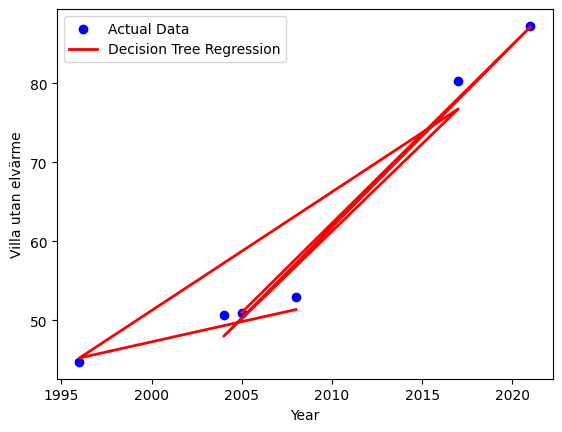

Predicted kWh price 2024: 101.5
    Year  Predicted kWh price
0   2025                101.5
1   2026                101.5
2   2027                101.5
3   2028                101.5
4   2029                101.5
5   2030                101.5
6   2031                101.5
7   2032                101.5
8   2033                101.5
9   2034                101.5
10  2035                101.5
11  2036                101.5
12  2037                101.5
13  2038                101.5
14  2039                101.5
15  2040                101.5
16  2041                101.5
17  2042                101.5
18  2043                101.5
19  2044                101.5
Mean Squared Error (MSE): 3.6744791666666665
R-squared (R²): 0.9861792453600237


C:\Users\ch_ra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\ch_ra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("elpriser_sverige96-23.csv")
# List of columns to increase by 25% (skatt)
columns_to_increase = ['Lägenhet', 'Villa utan elvärme', 'Villa med elvärme', 'Större hushåll', 'Näringsverksamhet', 'Småindustri']

# Add 25% to the specified columns
data[columns_to_increase] = data[columns_to_increase] * 1.25

# Columns of interest
data = data[["Year", "Villa utan elvärme"]]

# Split the data into features (X) and the target (y)
X = data[["Year"]]
y = data["Villa utan elvärme"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
model = DecisionTreeRegressor()  # Use DecisionTreeRegressor

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Visualize the results (optional)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Decision Tree Regression')
plt.xlabel("Year")
plt.ylabel("Villa utan elvärme")
plt.legend()
plt.show()

# Now, you can use the model to make predictions for any given year
year_to_predict = 2024
predicted_value = model.predict([[year_to_predict]])
print(f"Predicted kWh price {year_to_predict}: {predicted_value[0]}")

# Create a list of future years for prediction
future_years = [2024 + i for i in range(1, 21)]  # Predict for the next 20 years

# Predict 'Villa utan elvärme' values for each future year
future_predictions = model.predict([[year] for year in future_years])

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'Year': future_years, 'Predicted kWh price': future_predictions})

# Display the predictions
print(predictions_df)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
